In [1]:
import os
import math
import random

import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ssd import *

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
raw_image  = tf.placeholder(tf.uint8, shape=(None, None, 3))
out_shape = (300, 300)
image = tf.to_float(raw_image)
image = image - tf.constant([123., 117., 104.])
image = tf.image.resize_images(image, (300, 300), method=tf.image.ResizeMethod.BILINEAR, align_corners=False)
image = tf.expand_dims(image, axis=0)

In [3]:
with arg_scope(ssd_arg_scope(weight_init=None, weight_reg=None,
          bias_init=tf.zeros_initializer, bias_reg=None, is_training=False)):
    net, endpoints, prediction_gathers = ssd_vgg16(image, scope='ssd_vgg16_300') 
    gather_locations, gather_scores = prediction_gathers
    gather_anchors = layers_anchors(endpoints)
    gather_decode_bboxes = layers_decoding(gather_locations, gather_anchors)
    scores, bboxes = layers_select_nms(gather_scores, gather_decode_bboxes, select_th=0.5)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, '/home/yifeng/Models/ckpts/ssd_vgg16_300/SSD_VGG300_120000.ckpt')

INFO:tensorflow:Restoring parameters from /home/yifeng/Models/ckpts/ssd_vgg16_300/SSD_VGG300_120000.ckpt


In [6]:
path = 'demo/'
image_names = sorted(os.listdir(path))
image_v = mpimg.imread(path + image_names[-1])

In [7]:
scores_v, bboxes_v = sess.run([scores, bboxes], feed_dict={raw_image: image_v})

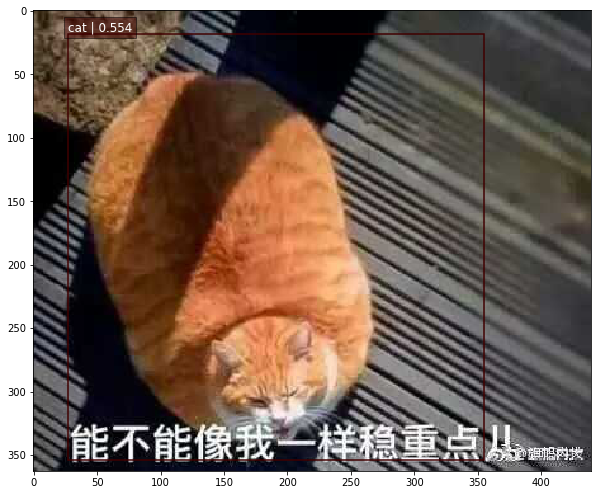

In [8]:
from datasets.pascal_voc_utils import pascal_voc_palette, pascal_voc_classes
from utils.visualization import plt_bboxes
plt_bboxes(image_v, scores_v, bboxes_v, palette=pascal_voc_palette, name_map=pascal_voc_classes)